#### <b>FMCG Sales Demand Forecasting and Optimization</b>

Dataset acquired from Kaggle

<!-- https://www.kaggle.com/datasets/krishanukalita/fmcg-sales-demand-forecasting-and-optimization -->

#### Import Library

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Load Dataset

In [42]:
# Download latest version
import kagglehub
url = kagglehub.dataset_download("krishanukalita/fmcg-sales-demand-forecasting-and-optimization")
urlpath = '\extended_fmcg_demand_forecasting.csv'

In [43]:
filepath  = r'C:\Users\wareh\.cache\kagglehub\datasets\krishanukalita\fmcg-sales-demand-forecasting-and-optimization\versions\1\extended_fmcg_demand_forecasting.csv'
file = f'{url}{urlpath}'
print(file)

C:\Users\wareh\.cache\kagglehub\datasets\krishanukalita\fmcg-sales-demand-forecasting-and-optimization\versions\1\extended_fmcg_demand_forecasting.csv


In [44]:
df = pd.read_csv(file)
if 'Date' in df.columns:df['Date'] = pd.to_datetime(df['Date'])

#### Workspace (Clean & Preprocess)

In [12]:
display(df.info(), df[:2])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Date                     1000 non-null   datetime64[ns]
 1   Product_Category         1000 non-null   object        
 2   Sales_Volume             1000 non-null   int64         
 3   Price                    1000 non-null   float64       
 4   Promotion                1000 non-null   int64         
 5   Store_Location           1000 non-null   object        
 6   Weekday                  1000 non-null   object        
 7   Supplier_Cost            1000 non-null   float64       
 8   Replenishment_Lead_Time  1000 non-null   int64         
 9   Stock_Level              1000 non-null   int64         
 10  Month                    1000 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(4)
memory usage: 86.1+ KB


None

,Date,Product_Category,Sales_Volume,Price,Promotion,Store_Location,Weekday,Supplier_Cost,Replenishment_Lead_Time,Stock_Level,Month
0,2022-01-01,Household,1583,5.190661,0,Urban,Saturday,9.299281,9,207,2022-01
1,2022-01-02,Personal Care,1103,8.949596,0,Urban,Sunday,13.274109,5,253,2022-01


In [13]:
df.describe().round(0)

,Date,Sales_Volume,Price,Promotion,Supplier_Cost,Replenishment_Lead_Time,Stock_Level
count,1000,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0
mean,2023-05-15 12:00:00,1049.0,10.0,0.0,8.0,5.0,266.0
min,2022-01-01 00:00:00,101.0,1.0,0.0,1.0,1.0,50.0
25%,2022-09-07 18:00:00,592.0,6.0,0.0,4.0,3.0,152.0
50%,2023-05-15 12:00:00,1064.0,10.0,0.0,7.0,5.0,260.0
75%,2024-01-20 06:00:00,1489.0,15.0,1.0,11.0,7.0,376.0
max,2024-09-26 00:00:00,1997.0,20.0,1.0,15.0,9.0,499.0
std,NaN,540.0,5.0,1.0,4.0,3.0,131.0


In [45]:
df['Weekday'] = df['Date'].dt.day_name()
df['Month'] = df['Date'].dt.to_period('M').astype(str)

In [ ]:
# # indexing date for time-based analysis
# df.set_index('Date', inplace=True)

# daily_sales = df['Sales_Volume'].resample('D').sum()

#### Plot

In [20]:
# Groupby for easier EDA
a = 'Month'
b = 'Product_Category'
c = 'Store_Location'
d = 'Weekday'
e = 'Sales_Volume'
f = 'Price'
g = 'Stock_Level'
h = 'Supplier_Cost'

dfG_DSSPS = df.groupby('Date')[[e,f,g,h]].sum()
dfG_MSSPS = df.groupby([a,b,c])[[e,f,g]].sum().reset_index().round(2)
# df.groupby(a)[[e,f,g,h]].sum().round(2)[:2]

dfG_MSSPS[:3]

,Month,Product_Category,Store_Location,Sales_Volume,Price,Stock_Level
0,2022-01,Beverages,Suburban,1892,8.29,384
1,2022-01,Beverages,Urban,3115,20.18,571
2,2022-01,Dairy,Rural,5973,57.92,1441


In [17]:
sns.set_theme(style="whitegrid")

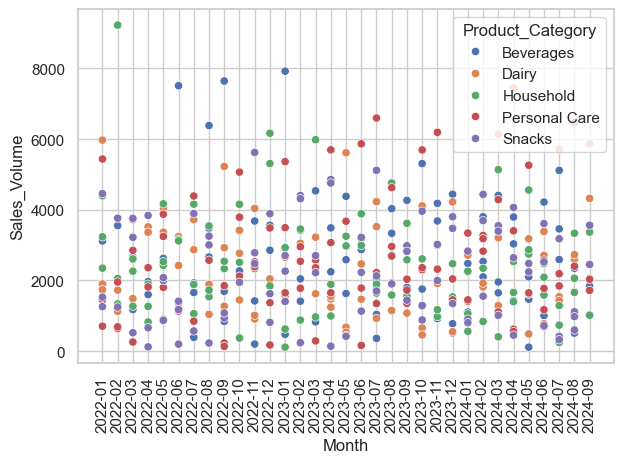

In [27]:
# Scatter plot
sns.scatterplot(data=dfG_MSSPS, x='Month', y='Sales_Volume', hue='Product_Category')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
# Lineplot of Daily Sales
plt.figure(figsize=(8,6))
sns.lineplot(data=df, x='Date', y='Sales_Volume', marker='o')
plt.title('Daily Sales Volume Over Time')
plt.xticks(rotation=90)
plt.grid(True)
# plt.legend()
plt.show()

In [ ]:
# 1. Lineplot of Monthly Sales
plt.figure(figsize=(8, 6))
sns.lineplot(data=df.groupby(a)[e].sum().reset_index(),
             x=a, y=e,
             color='blue', marker='o')
plt.title('Monthly Sales Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Sales Volume')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
# 2. Barplot of Sales Volume by Product Category
plt.figure(figsize=(8, 6))
# sns.barplot(x=category_sales.index, y=category_sales.sort_values(ascending=False), hue=category_sales,  palette="viridis_r")
sns.barplot(data=df.groupby(b)[e].sum().reset_index().sort_values(by=e, ascending=False),
            x=b, y=e,
            hue='Product_Category',  palette="viridis_r")
plt.title('Total Sales Volume by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Sales Volume')
plt.show()

In [ ]:
# 3. Boxplot of Sales Volume with/without Promotion on Product Category
plt.figure(figsize=(8, 6))
sns.boxplot(data=df ,
            x='Promotion', y='Sales_Volume',
            hue='Product_Category', palette="Set2")
plt.title('Sales Volume Distribution by Promotion Status')
plt.xlabel('Promotion (0 = No, 1 = Yes)')
plt.ylabel('Sales Volume')
plt.show()

In [ ]:
# 4. Piechart of Sales by Store Location
plt.figure(figsize=(8, 8))
plt.pie(df.groupby(c)[e].sum(), labels=df.groupby(c)[e].sum().index,
        autopct='%1.1f%%', startangle=140, shadow=True,
        colors=sns.color_palette("pastel"))
plt.title('Sales Distribution by Store Location')
plt.show()

In [ ]:
# 5. Barchart of Average Sales Volume by Weekday
day = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

plt.figure(figsize=(8, 6))
sns.barplot(data=df.groupby(d)[e].mean().reindex(day).reset_index().round(0),
            x=e, y=d, hue=e, palette="Blues_d")
plt.title('Average Sales Volume by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Average Sales Volume')
plt.xlim(600,1200)
plt.show()

In [ ]:
# 6. Boxplot of Sales Volume with/without Promotion on Product Category
plt.figure(figsize=(8, 6))
sns.boxplot(x='Promotion', y='Sales_Volume', data=df, hue='Weekday', palette="Set2")
plt.title('Sales Volume Distribution by Promotion Status')
plt.xlabel('Promotion (0 = No, 1 = Yes)')
plt.ylabel('Sales Volume')
plt.show()

In [ ]:
# 7. Boxplot of Supplier Cost with/without Promotion on Product Category
plt.figure(figsize=(8, 6))
sns.boxplot(x='Promotion', y='Supplier_Cost', data=df, hue='Product_Category', palette="Set2")
plt.title('Supplier Cost by Promotion Status')
plt.xlabel('Promotion (0 = No, 1 = Yes)')
plt.ylabel('Supplier Cost')
plt.show()

#### Predict and Forecast

##### ARIMA

In [46]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error

In [67]:
dfsetindex = df.set_index('Date')
df_DSales = dfsetindex['Sales_Volume'].resample('D').sum()
df_DSales[:3]

Date
2022-01-01    1583
2022-01-02    1103
2022-01-03     455
Freq: D, Name: Sales_Volume, dtype: int64

In [ ]:
# train, test
train_size = int(len(df_DSales) * 0.8)
train, test = df_DSales[:train_size], df_DSales[train_size:]

In [69]:
# model fit
model = ARIMA(train, order=(5,1,2))  # Example parameters
model_fit = model.fit()

C:\Users\wareh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [70]:
# make predictions
forecast = model_fit.forecast(steps=len(test))
mae = mean_absolute_error(test, forecast)

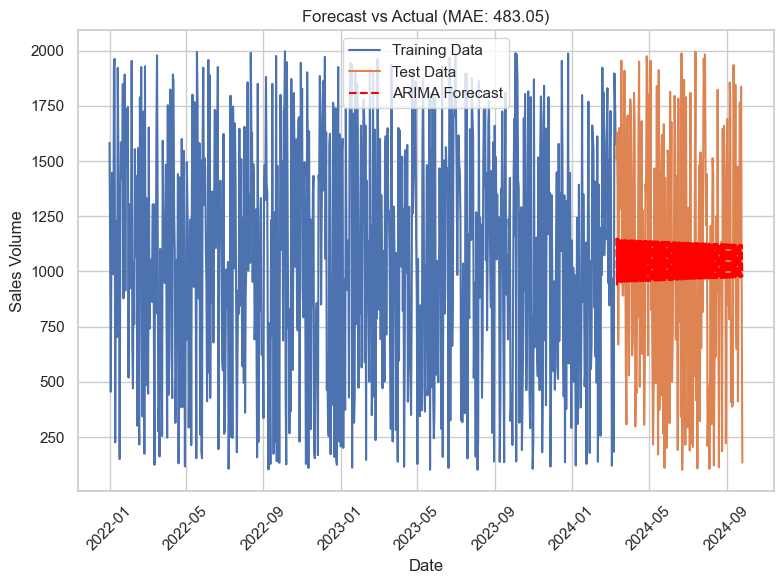

In [78]:
# PLotting forecast
plt.figure(figsize=(8, 6))
plt.plot(train, label='Training Data')
plt.plot(test, label='Test Data')
plt.plot(test.index, forecast, color='red',
         linestyle='--', label='ARIMA Forecast')
plt.title(f'Forecast vs Actual (MAE: {mae:.2f})')
plt.xlabel('Date')
plt.ylabel('Sales Volume')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

##### FB Prophet

In [79]:
from prophet import Prophet

In [ ]:
# Renaming column as 'ds' and 'y'
df_Prophet = df_DSales.reset_index().rename(columns={'Date': 'ds', 'Sales_Volume': 'y'})
df_Prophet[:3]

,ds,y
0,2022-01-01,1583
1,2022-01-02,1103
2,2022-01-03,455


In [83]:
# model fit
model = Prophet(yearly_seasonality=True, daily_seasonality=False)
model.fit(df_Prophet)

12:50:08 - cmdstanpy - INFO - Chain [1] start processing
12:50:08 - cmdstanpy - INFO - Chain [1] done processing


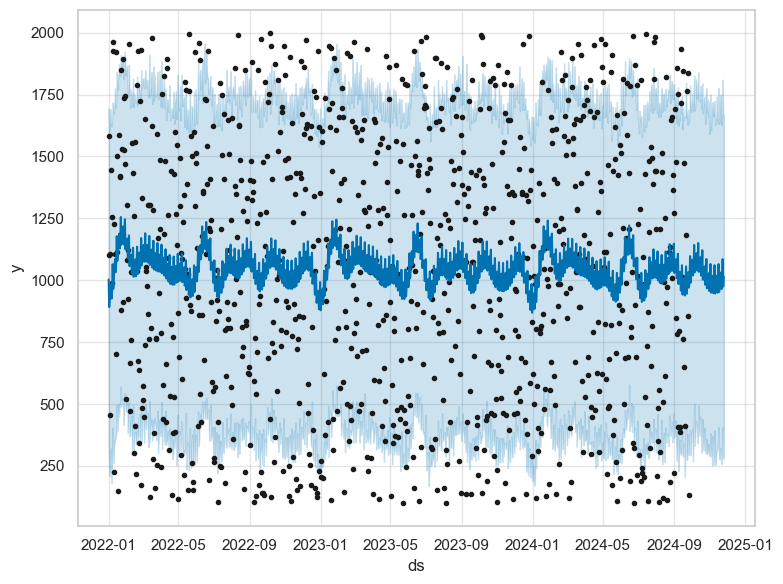

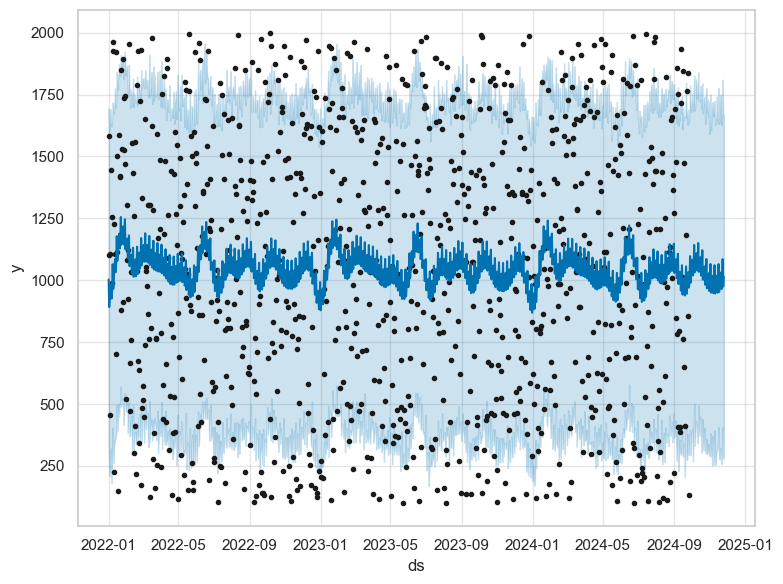

In [106]:
# Create and plot forecast
future = model.make_future_dataframe(periods=60)  # Forecasting 30 days ahead
forecast = model.predict(future)

model.plot(forecast, figsize=(8,6))

In [91]:
display(future, forecast)

,ds
0,2022-01-01
1,2022-01-02
2,2022-01-03
3,2022-01-04
4,2022-01-05
...,...
1055,2024-11-21
1056,2024-11-22
1057,2024-11-23
1058,2024-11-24


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-01-01,1060.267210,304.733488,1664.337472,1060.267210,1060.267210,-57.471768,-57.471768,-57.471768,71.259026,71.259026,71.259026,-128.730794,-128.730794,-128.730794,0.0,0.0,0.0,1002.795442
1,2022-01-02,1060.241657,157.295473,1554.091336,1060.241657,1060.241657,-168.525015,-168.525015,-168.525015,-43.206562,-43.206562,-43.206562,-125.318454,-125.318454,-125.318454,0.0,0.0,0.0,891.716642
2,2022-01-03,1060.216104,291.112779,1605.550070,1060.216104,1060.216104,-127.843593,-127.843593,-127.843593,-7.909037,-7.909037,-7.909037,-119.934556,-119.934556,-119.934556,0.0,0.0,0.0,932.372511
3,2022-01-04,1060.190552,269.470873,1606.995395,1060.190552,1060.190552,-98.864577,-98.864577,-98.864577,13.762226,13.762226,13.762226,-112.626803,-112.626803,-112.626803,0.0,0.0,0.0,961.325975
4,2022-01-05,1060.164999,334.272294,1688.871857,1060.164999,1060.164999,-75.640987,-75.640987,-75.640987,27.841577,27.841577,27.841577,-103.482563,-103.482563,-103.482563,0.0,0.0,0.0,984.524012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1055,2024-11-21,1033.850227,236.100764,1601.273866,1033.849023,1033.851305,-69.387058,-69.387058,-69.387058,-41.848353,-41.848353,-41.848353,-27.538705,-27.538705,-27.538705,0.0,0.0,0.0,964.463169
1056,2024-11-22,1033.825239,298.954952,1677.203271,1033.823989,1033.826357,-43.826981,-43.826981,-43.826981,-19.898876,-19.898876,-19.898876,-23.928104,-23.928104,-23.928104,0.0,0.0,0.0,989.998258
1057,2024-11-23,1033.800250,387.819372,1762.259940,1033.798999,1033.801403,51.316988,51.316988,51.316988,71.259026,71.259026,71.259026,-19.942038,-19.942038,-19.942038,0.0,0.0,0.0,1085.117238
1058,2024-11-24,1033.775262,285.254109,1704.881105,1033.773964,1033.776459,-58.813590,-58.813590,-58.813590,-43.206562,-43.206562,-43.206562,-15.607028,-15.607028,-15.607028,0.0,0.0,0.0,974.961672


In [107]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [108]:
# Fit Holt-Winters model
hw_model = ExponentialSmoothing(train, seasonal='add', trend='add', seasonal_periods=7).fit()
hw_forecast = hw_model.forecast(steps=len(test))

C:\Users\wareh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


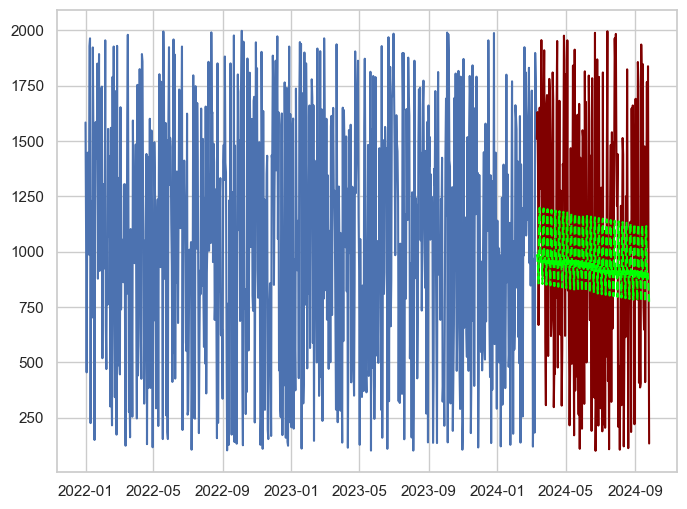

In [158]:
# Plot the chart
plt.figure(figsize=(8,6))
plt.plot(train, label='Training Data')
plt.plot(test, label='Test Data', color='maroon')
plt.plot(test.index, hw_forecast, color='lime',
         linestyle='--', label='Holt-Winters Forecast')

In [160]:
df[['Sales_Lag1', 'Sales_Volume']] #.shift(1)

KeyError: "['Sales_Lag1'] not in index"

In [198]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder

In [231]:
df = pd.get_dummies(df, columns=['Weekday'], drop_first=True)

In [246]:
# create new column
df['Sales_Lag1'] = df['Sales_Volume'].shift(1) # lag feature
df['Rolling_Mean'] = df['Sales_Volume'].rolling(window=7).mean() # 7-day rolling mean
df.dropna(inplace=True)

# X = df.loc[:,~df.columns.isin(['Date','Sales_Volume'])] # exclude 'date' and 'sales' col
X = df.drop(columns=['Sales_Volume', 'Date', 'Month','Product_Category', 'Store_Location' ])
y = df['Sales_Volume']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [226]:
df.loc[:,df.columns!='Date'] [:1]

,Product_Category,Sales_Volume,Price,Promotion,Store_Location,Weekday,Supplier_Cost,Replenishment_Lead_Time,Stock_Level,Month,Sales_Lag1,Rolling_Mean
48,Snacks,1789,12.17984,1,Rural,Friday,1.40719,9,145,2022-02,216.0,995.571429


In [229]:
df.loc[:,~df.columns.isin(['Date','Sales_Volume'])] [:2]

,Product_Category,Price,Promotion,Store_Location,Weekday,Supplier_Cost,Replenishment_Lead_Time,Stock_Level,Month,Sales_Lag1,Rolling_Mean
54,Dairy,9.398463,0,Rural,Thursday,2.746417,7,417,2022-02,636.0,1161.285714
55,Beverages,7.286898,1,Suburban,Friday,1.699684,2,479,2022-02,1725.0,930.571429


In [220]:
df[df.columns.difference(['Date', 'Sales_Volume'])] [:1]

,Month,Price,Product_Category,Promotion,Replenishment_Lead_Time,Rolling_Mean,Sales_Lag1,Stock_Level,Store_Location,Supplier_Cost,Weekday
48,2022-02,12.17984,Snacks,1,9,995.571429,216.0,145,Rural,1.40719,Friday


In [247]:
# model fit
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)
xgb_forecast = xgb_model.predict(X_test)
mae = mean_absolute_error(y_test, xgb_forecast)

In [289]:
y_test.max()
# xgb_forecast.max()

1995

(0.0, 200.0)

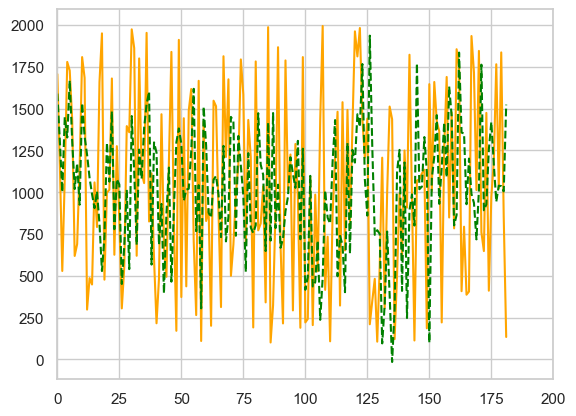

In [287]:
# Plot MAE
plt.plot(range(len(y_test)), y_test, color='orange' , label='Actual Sales')
plt.plot(range(len(y_test)), xgb_forecast, color='green', linestyle='--', label='XGBoost Forecast')
plt.xlim(0,200)

In [256]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [ ]:
# train, test
X_train, y_train = np.array(X_train).astype(np.float32), np.array(y_train).astype(np.float32)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))

In [261]:
# model fit
model = Sequential([
    LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(1)
])

C:\Users\wareh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [262]:
model.compile(optimizer='adam', loss='mae')
model.fit(X_train, y_train, epochs=50, verbose=0)

Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 407.1248
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 408.0938
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 402.9193 
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 403.2468
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 400.9595
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 387.4821
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 411.6499
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 401.6984
Epoch 9/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 400.7813
Epoch 10/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 417.3130
Epoch 11/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 395.9219
Epoch 12/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 396.5723
Epoch 13/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 417.8084
Epoch 14/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 404.8947
Epoch 15/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - los

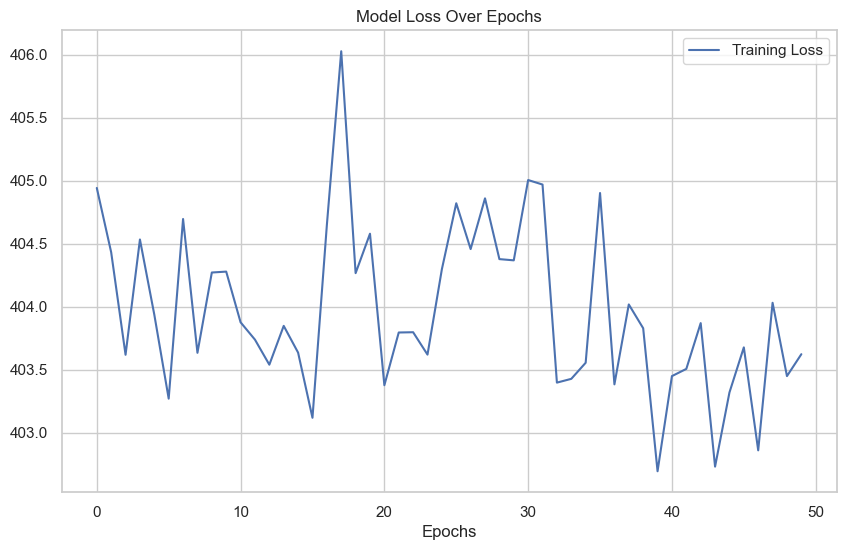

In [268]:
# Plot
plt.figure(figsize=(10, 6))
history = model.fit(X_train, y_train, epochs=50)
plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.legend()
plt.show()